# Decision Tree - 3

#### Decision Tree 실습 04

타이타닉 데이터 사용

##### 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


titanic_data = pd.read_excel('titanic.xls')
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


##### 데이터 분석 (시각화, EDA - 탐색적 데이터분석)

- 데이터를 세부적으로 살펴보는 것 <br> 
  (결측치, 이상치, 데이터분포, 라벨의 분포, 범주형 데이터의 종류 등 확인)
- 데이터를 시각화
- 데이터를 어떻게 수정할 것인지 결정

In [2]:
# 결측치 확인
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


- pclass : 객실 등급
- survived : 생존 유무
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- fare : 지불한 운임
- boat : 탈출한 보트가 있다면 boat 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [3]:
# 이상치 확인
titanic_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


- survived를 보면 인해 생존률이 38.2%임을 알 수 있음

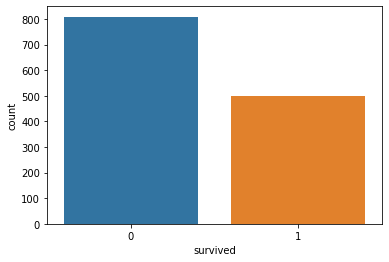

In [4]:
# 생존자 수 확인
import seaborn as sns

# countplot: 범주형 변수의 빈도수를 시각화
sns.countplot('survived', data=titanic_data)

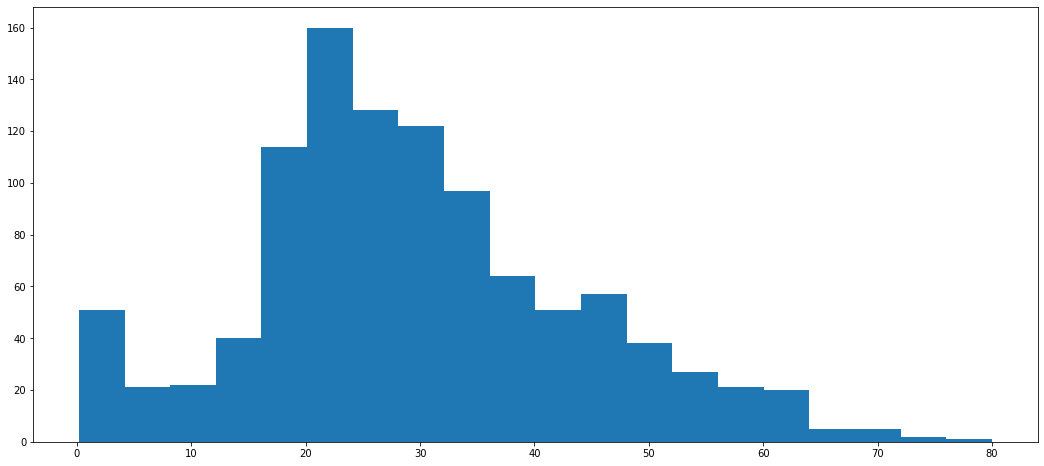

In [5]:
# 나이 분포
titanic_data['age'].hist(bins=20, figsize=(18,8), grid=False);

In [6]:
# 선실 등급별 상황
titanic_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


- 1등실 생존율이 높음
- 나이 평균을 보면 3등실에 갓난아이가 많았을 수도....

**heatmap**

- Target Feature와 나머지 독립변수들의 상관계수를 직관적으로 확인
- 데이터.corr() : heatmap에 사용할 데이터의 상관계수

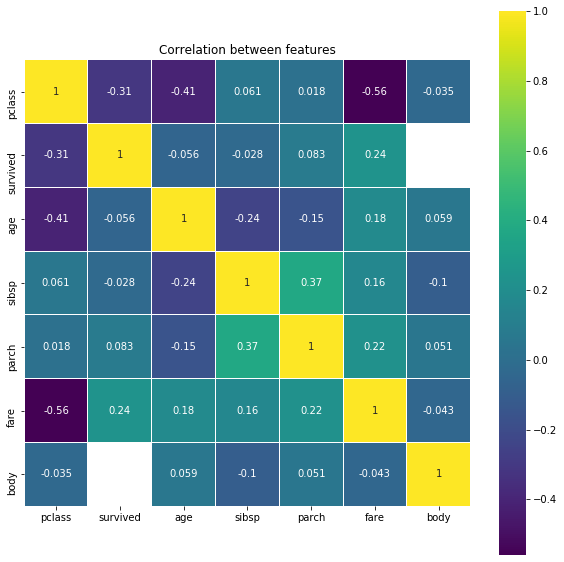

In [7]:
# 특성의 상관관계 분석
plt.figure(figsize=(10, 10))
sns.heatmap(titanic_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

-  survived는 pclass와 fare와 관계가 있어 보임

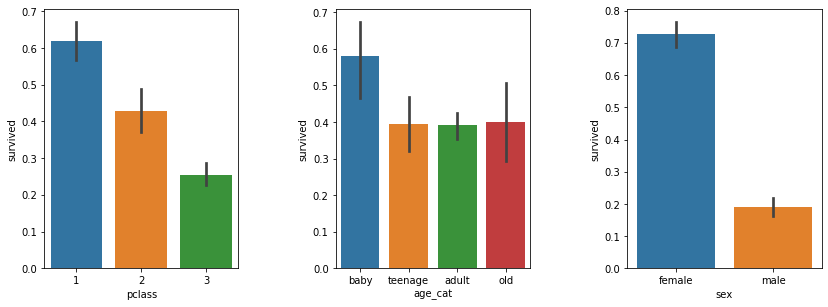

In [8]:
# 객실 등급(pclass)별, 연령대별, 성별 비교
titanic_data['age_cat'] = pd.cut(titanic_data['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 
                                                          'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=titanic_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=titanic_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=titanic_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()
# seaborn은 barplot() 함수를 사용할 때 각 막대에 기본적으로 오차막대(error bar)가 함께 나타나도록 되어 있다.
# 오차막대를 그리는 범위는 기본적으로 
# “이 데이터를 기반으로 유사한 상황의 95 %가이 범위 내에서 결과를 얻을 것”을 의미한다.

- pclass는 1등석인 경우 확실히 생존률이 높았음

- 0세에서 10세로 구분한 baby 등급의 연령대 아이들의 생존률이 다른 연령대보다 높음

- 남성보다 여성의 생존률이 높았음

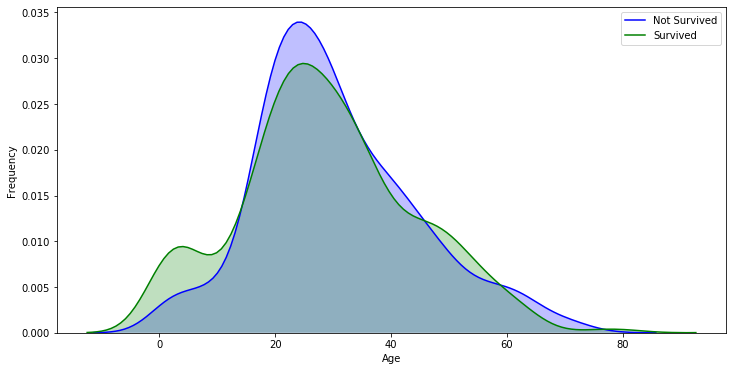

In [9]:
# 연령대별 생존여부 분포 비교
f,ax = plt.subplots(figsize=(12,6))

# 커널밀도추정 KDE ; 데이터의 분포를 확인
g = sns.kdeplot(titanic_data["age"][(titanic_data["survived"] == 0) 
& (titanic_data["age"].notnull())], 
                ax = ax, color="Blue", shade = True)
g = sns.kdeplot(titanic_data["age"][(titanic_data["survived"] == 1) & (titanic_data["age"].notnull())], 
                ax =g, color="Green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

- 어린아이의 생존율이 높았다는 것을 알 수 있음

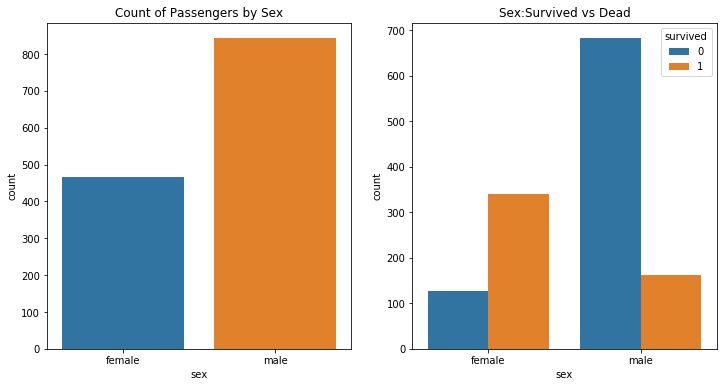

In [10]:
# 성별 생존자수 비교
f,ax=plt.subplots(1, 2, figsize=(12,6))

sns.countplot('sex', data=titanic_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex', hue='survived', data=titanic_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 두배쯤 많은 남성 승객수에도 불구하고, 구조된 여성의 수가 두배쯤 더 많다는 사실이 나타남

- 당시 타이타닉에 탑승했던, 그리고 죽음의 위기에 처했던 사람들 중 아이와 여성에게 삶을 양보한 사람들이 많았음을 추정


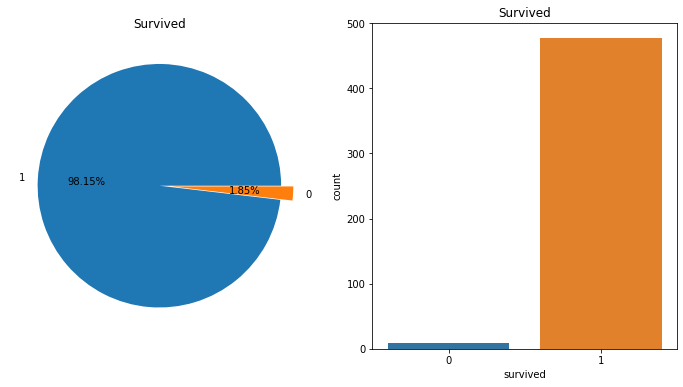

In [11]:
# 구조 보트에 탑승하고도 사망한 비율
boat_survivors = titanic_data[titanic_data['boat'].notnull()]
f,ax = plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 구조 보트에 탑승하고도 사망한 비율이 1.85%


##### 데이터 전처리

In [12]:
# 데이터 로드
titanic_data = pd.read_excel('titanic.xls')
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [13]:
# - embarked : 탑승장소별 컬럼 추가
# S=Southhampton, C=Cherbourg, Q=Queenstown
titanic_data["Embarked_C"] = titanic_data["embarked"] == "C"
titanic_data["Embarked_S"] = titanic_data["embarked"] == "S"
titanic_data["Embarked_Q"] = titanic_data["embarked"] == "Q"


# 데이터에서 여성을 1로 남성을 0으로 설정
titanic_data.loc[titanic_data["sex"] == "male", "sex"] = 0 
titanic_data.loc[titanic_data["sex"] == "female", "sex"] = 1

# fare : 지불한 운임
mean_fare = titanic_data["fare"].mean()

# 결측치 채움
titanic_data.loc[ pd.isnull(titanic_data["fare"]) , "fare"] = mean_fare
titanic_data[pd.isnull(titanic_data["fare"])]

titanic_data.head()
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   sex         1309 non-null   object 
 4   age         1046 non-null   float64
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1309 non-null   float64
 9   cabin       295 non-null    object 
 10  embarked    1307 non-null   object 
 11  boat        486 non-null    object 
 12  body        121 non-null    float64
 13  home.dest   745 non-null    object 
 14  Embarked_C  1309 non-null   bool   
 15  Embarked_S  1309 non-null   bool   
 16  Embarked_Q  1309 non-null   bool   
dtypes: bool(3), float64(3), int64(4), object(7)
memory usage: 147.1+ KB


In [14]:
# Feature 선택
# X = 객실 클래스, 성별, 요금, 선착장 3개, 총 6요소
feature_names = ["pclass", "sex", "fare", "Embarked_C", "Embarked_Q", "Embarked_S"]

X = titanic_data[feature_names]

print(X.shape)
X.head()

(1309, 6)


,pclass,sex,fare,Embarked_C,Embarked_Q,Embarked_S
0,1,1,211.3375,False,False,True
1,1,0,151.5500,False,False,True
2,1,1,151.5500,False,False,True
3,1,0,151.5500,False,False,True
4,1,1,151.5500,False,False,True


In [15]:
# 정답셋 준비
# y = "survived"
label_name = "survived"

y = titanic_data[label_name]

print(y.shape)
y.head()

(1309,)


0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

#### Decision Tree 실습 05

결정트리로 타이타닉 생존자 예측

In [16]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=13)

In [17]:
# 결정트리 적용
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=13)
model.fit(X_train, y_train)
print('Train Score: {:.3f}'.format(model.score(X_train, y_train)))
print('Test Score: {:.3f}'.format(model.score(X_test, y_test)))

Train Score: 0.799
Test Score: 0.817


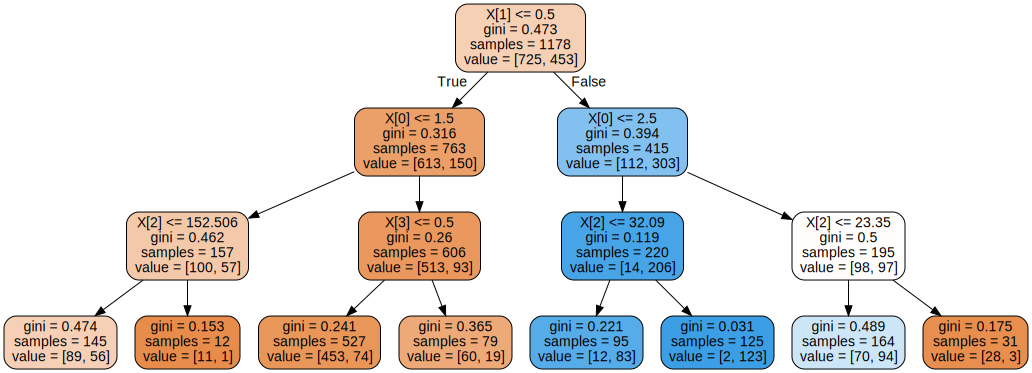

In [18]:
# 트리 구조 시각화하기
from sklearn.tree import export_graphviz
import graphviz

dot_graph = export_graphviz(model, out_file=None,
                           impurity=True, filled=True, rounded=True)
display( graphviz.Source(dot_graph) )

In [19]:
# 실제 데이터를 넣어서 예측하기
# pclass, sex, age, sibsp, parch, fare
# dicaprio = [3., 0., 19., 0., 0., 5.]
# winslet  = [1., 1., 17., 1., 2., 100.]
dicaprio = [3., 0., 19., True, False, False]
winslet  = [1., 1., 17., False, False, True]

def isSurvived(name, person):
    isSurvive = 'not survived' if model.predict([person])[0] == 0 else 'survived'
    print(name, ' is ', isSurvive, 
          ' --> ', max(model.predict_proba([person])[0]))
    
isSurvived('Dicaprio', dicaprio)
isSurvived('Winslet', winslet)

Dicaprio  is  not survived  -->  0.759493670886076
Winslet  is  survived  -->  0.8736842105263158
